In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [9]:
df = pd.read_csv('movies.csv')
df.head()

,Home_Page,Movie_Name,Genres,Overview,Cast,Original_Language,Storyline,Production_Company,Release_Date,Tagline,Vote_Average,Vote_Count,Budget_USD,Revenue_.,Run_Time_Minutes,Release_Country,release_month
0,https://www.imdb.com/title/tt5040012/,Nosferatu,"['Fantasy', 'Horror', 'Mystery']",A gothic tale of obsession between a haunted y...,"['Lily-Rose Depp', 'Nicholas Hoult', 'Bill Ska...","['English', 'German', 'Romanian', 'Russian']",A gothic tale of obsession between a haunted y...,"['Focus Features', 'Maiden Voyage Pictures', '...",2024-12-25,Succumb to the darkness.,7.3,151.0,50.0,176.0,132.0,United States,December
1,https://www.imdb.com/title/tt20221436/,Emilia Pérez,"['Comedy', 'Crime', 'Drama', 'Musical', 'Thril...",Emilia Pérez follows three remarkable women in...,"['Zoe Saldaña', 'Karla Sofía Gascón', 'Selena ...","['Spanish', 'English']","In modern-day Mexico, overqualified and exploi...","['Why Not Productions', 'Page 114', 'Pathé']",2024-11-13,Not_Found,5.5,71.0,27.3,15.0,132.0,United States,November
2,https://www.imdb.com/title/tt8999762/,The Brutalist,['Drama'],When a visionary architect and his wife flee p...,"['Adrien Brody', 'Felicity Jones', 'Guy Pearce...","['English', 'Hungarian', 'Italian', 'Hebrew', ...",When visionary architect László Toth and his w...,"['Brookstreet Pictures', 'Kaplan Morrison', 'I...",2025-01-24,Welcome to America.,7.9,28.0,10.0,31.1,214.0,Canada,January
3,https://www.imdb.com/title/tt27657135/,Saturday Night,"['Biography', 'Comedy', 'Drama', 'History']","At 11:30pm on October 11th, 1975, a ferocious ...","['Gabriel LaBelle', 'Rachel Sennott', 'Cory Mi...",['English'],"At 11:30pm on October 11, 1975, a ferocious tr...","['Columbia Pictures', 'TSG Entertainment']",2024-10-11,"October 11, 1975, The First Saturday Night Liv...",7.0,26.0,25.0,10.0,109.0,United States,October
4,https://www.imdb.com/title/tt17526714/,The Substance,"['Drama', 'Horror', 'Sci-Fi']",A fading celebrity takes a black-market drug: ...,"['Demi Moore', 'Margaret Qualley', 'Dennis Qua...",['English'],Have you ever dreamed of a better version of y...,"['Working Title Films', 'A Good Story', 'Black...",2024-09-20,"If you follow the instructions, what could go ...",7.3,249.0,17.5,77.0,141.0,United States,September


In [10]:
summary = df['Vote_Average'].describe()
print(summary)

count    497.000000
mean       6.578471
std        1.071421
min        3.400000
25%        5.800000
50%        6.700000
75%        7.400000
max        9.300000
Name: Vote_Average, dtype: float64


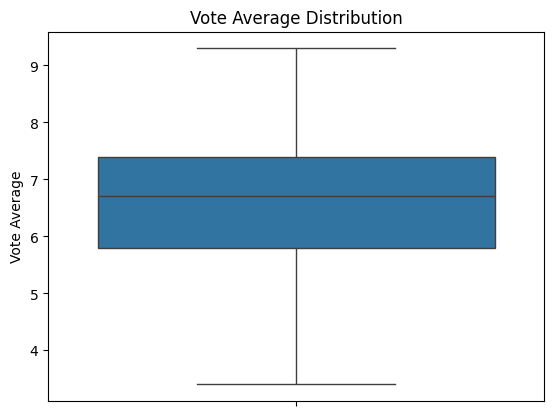

In [11]:
g = sns.boxplot(data=df, y='Vote_Average')
g.set_title('Vote Average Distribution')
g.set_ylabel('Vote Average')
plt.show()

In [12]:

summary = df['Run_Time_Minutes'].describe()
print(summary)

count    424.000000
mean      95.724057
std       34.175417
min       13.000000
25%       70.750000
50%      100.500000
75%      116.000000
max      214.000000
Name: Run_Time_Minutes, dtype: float64


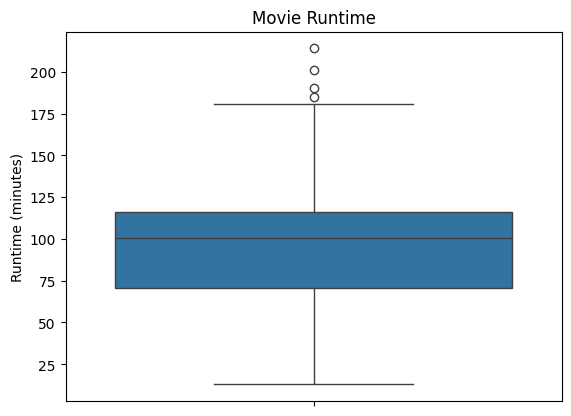

In [13]:
s = sns.boxplot(data=df, y='Run_Time_Minutes')
s.set_title('Movie Runtime')
s.set_ylabel('Runtime (minutes)')
plt.show()

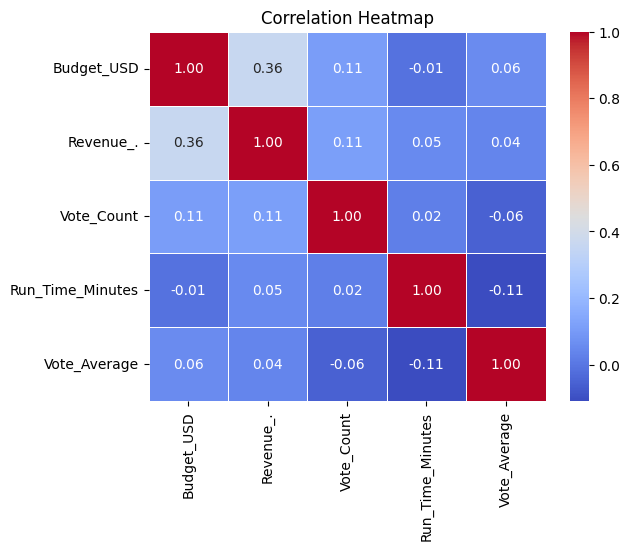

In [14]:


corr = df[['Budget_USD', 'Revenue_.', 'Vote_Count', 'Run_Time_Minutes', 'Vote_Average']].corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-15-785d3cead855>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='release_month', y='Vote_Average',palette='Set2')


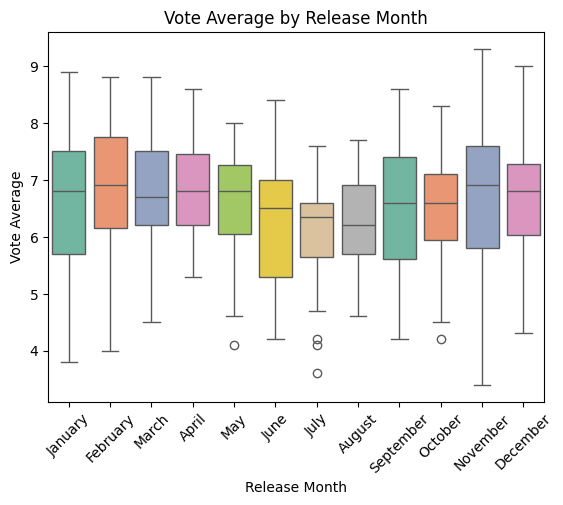

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['release_month'] = pd.Categorical(df['release_month'], categories=month_order, ordered=True)

sns.boxplot(data=df, x='release_month', y='Vote_Average',palette='Set2')
plt.title('Vote Average by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Vote Average')
plt.xticks(rotation=45)

plt.show()



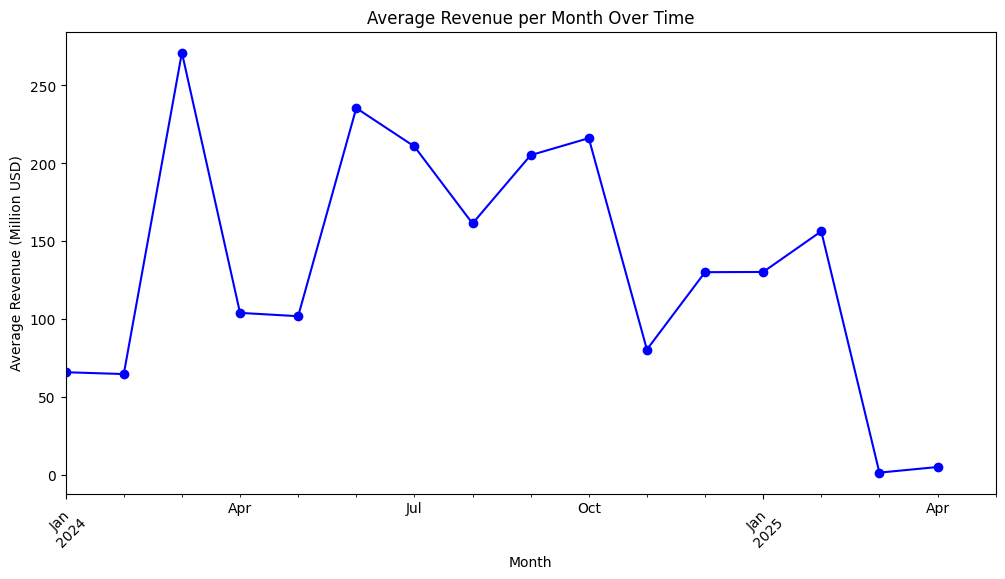

In [16]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Year_Month'] = df['Release_Date'].dt.to_period('M')

monthly_avg_revenue = df.groupby('Year_Month')['Revenue_.'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_revenue.plot(marker='o', linestyle='-', color='b')
plt.title('Average Revenue per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Average Revenue (Million USD)')
plt.xticks(rotation=45)
plt.show()


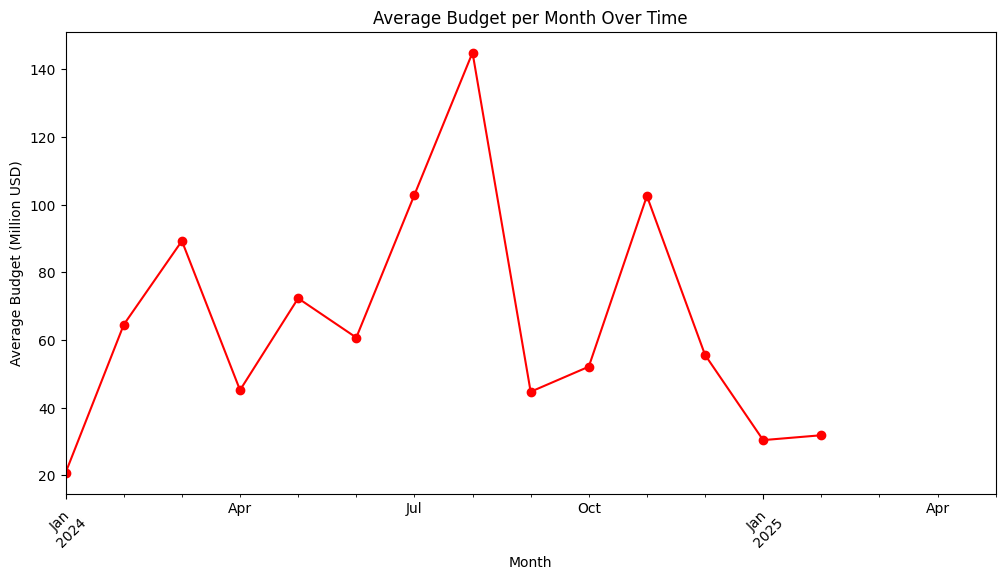

In [17]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Year_Month'] = df['Release_Date'].dt.to_period('M')

monthly_avg_budget = df.groupby('Year_Month')['Budget_USD'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_budget.plot(marker='o', linestyle='-', color='r')
plt.title('Average Budget per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Average Budget (Million USD)')
plt.xticks(rotation=45)
plt.show()


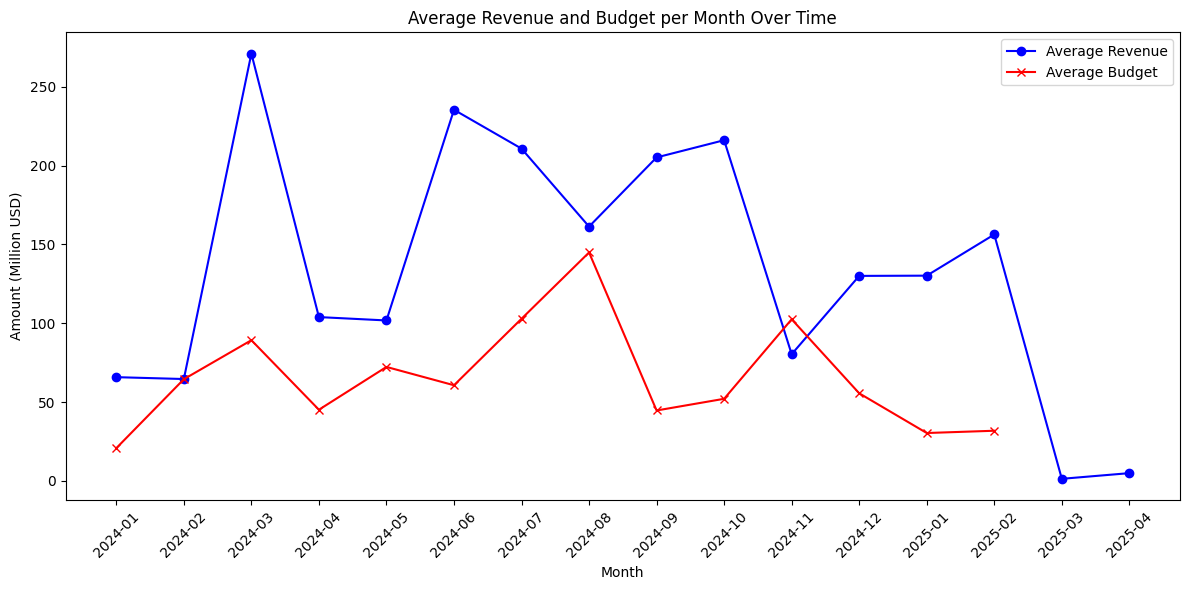

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_revenue.index.astype(str), monthly_avg_revenue, label='Average Revenue', marker='o', linestyle='-', color='b')
plt.plot(monthly_avg_budget.index.astype(str), monthly_avg_budget, label='Average Budget', marker='x', linestyle='-', color='r')

plt.title('Average Revenue and Budget per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Amount (Million USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

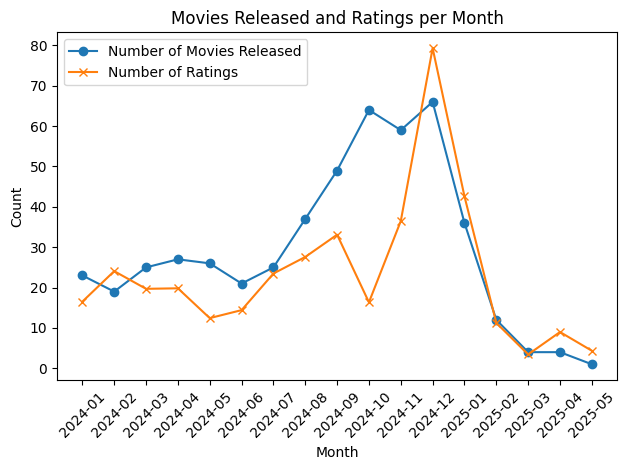

In [30]:
df['YearMonth'] = df['Release_Date'].dt.to_period('M')

movies_per_month = df.groupby('YearMonth').size()
ratings_per_month = (df.groupby('YearMonth')['Vote_Count'].sum())/100

plt.plot(movies_per_month.index.astype(str), movies_per_month, label='Number of Movies Released', marker='o')
plt.plot(ratings_per_month.index.astype(str), ratings_per_month, label='Number of Ratings (in hundreds)', marker='x')

plt.title('Movies Released and Ratings per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()